In [17]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']



X = df[['RM']].values
y = df[['MEDV']].values

In [18]:
from sklearn.linear_model import LinearRegression


slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


In [19]:
import matplotlib.pyplot as plt

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

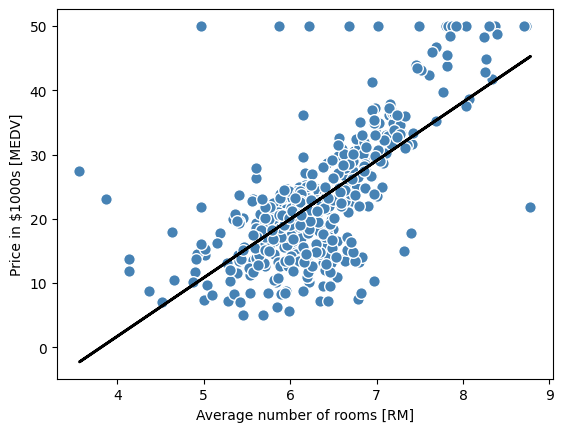

In [20]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

#plt.savefig('images/10_07.png', dpi=300)
plt.show()

c:\Users\HungVo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ransac.py:369: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  warnings.warn(


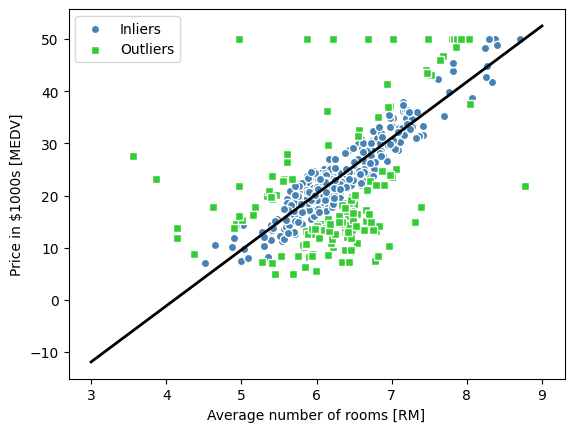

In [21]:
import numpy as np
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_loss', 
                         residual_threshold=5.0, 
                         random_state=0)

ransac.fit(X, y)



inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)


line_X = np.arange(3, 10, 1)

line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')


plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')
plt.show()

## Evaluating the performance of the linear regression model

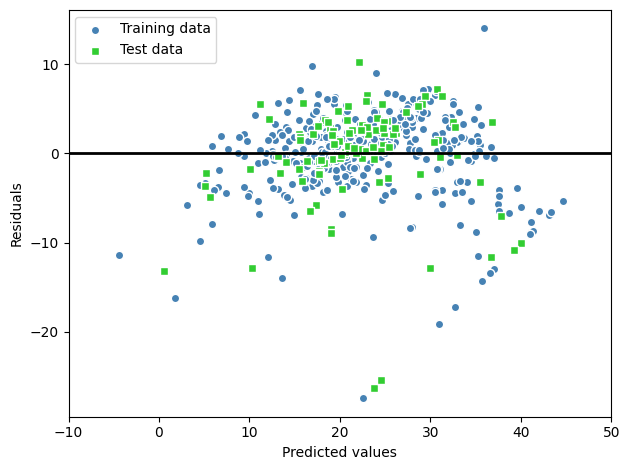

In [22]:
from sklearn.model_selection import train_test_split

X =  df.iloc[:, :-1].values
y =  df['MEDV'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
slr = LinearRegression()


slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)



plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

In [23]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 19.326, test: 33.449
R^2 train: 0.773, test: 0.589


## REGULIZED METHOD FOR LINEAR REGRESSION

In [24]:

from sklearn.linear_model import Lasso

## L1 regulization + linear regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)


[-0.1112467   0.04778405 -0.04324093  0.84231977 -0.          3.59482356
 -0.01448348 -1.11174872  0.20667126 -0.01286824 -0.89266205  0.00912047
 -0.52547891]


In [25]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 20.238, test: 36.075
R^2 train: 0.762, test: 0.557


In [26]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print(ridge.coef_)


[-1.16807614e-01  4.60034842e-02 -2.37620690e-02  2.27814972e+00
 -8.55779612e+00  3.75513528e+00 -1.04143035e-02 -1.28009479e+00
  2.22037885e-01 -1.15255734e-02 -9.69288272e-01  8.53481709e-03
 -4.98849035e-01]


In [27]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 19.487, test: 34.232
R^2 train: 0.771, test: 0.580


In [ ]:
from sklearn.linear_model import ElasticNet
## conbination of L1 and L2